In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("admission.csv",index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# EDA

In [3]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns=["Gre_Score","Tofel_Score","University_Rating","SOP","LOR","CGPA","Research","Chance_of_Admit"]

In [7]:
df.columns

Index(['Gre_Score', 'Tofel_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [8]:
df["Chance_of_Admit"]

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [9]:
for i in df.Chance_of_Admit:
    if i>0.80:
        df.Chance_of_Admit.replace(to_replace=i,value=1,inplace=True)
    else:
        df.Chance_of_Admit.replace(to_replace=i,value=0,inplace=True)

In [10]:
df["Chance_of_Admit"].astype(int)

Serial No.
1      1
2      0
3      0
4      0
5      0
      ..
496    1
497    1
498    1
499    0
500    1
Name: Chance_of_Admit, Length: 500, dtype: int32

In [11]:
df.dtypes

Gre_Score              int64
Tofel_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

<AxesSubplot:>

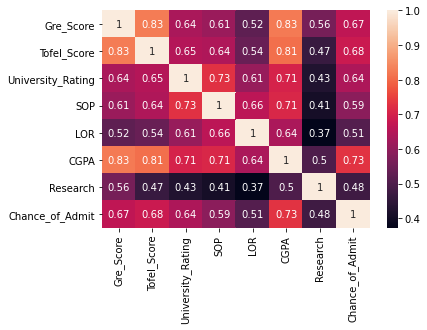

In [12]:
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)

In [13]:
df.sample(n=10)# to select the 10 random sample from the data

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
3,316,104,3,3.0,3.5,8.00,1,0.0
298,320,120,3,4.0,4.5,9.11,0,1.0
107,329,111,4,4.5,4.5,9.18,1,1.0
443,331,116,4,4.5,4.5,9.44,1,1.0
456,305,102,2,1.5,2.5,7.64,0,0.0
34,340,114,5,4.0,4.0,9.60,1,1.0
459,312,100,1,3.0,3.0,8.53,1,0.0
374,321,109,3,3.0,3.0,8.54,1,0.0
249,324,110,3,3.5,4.0,8.87,1,0.0


In [14]:
df.describe()

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.284000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.451388
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


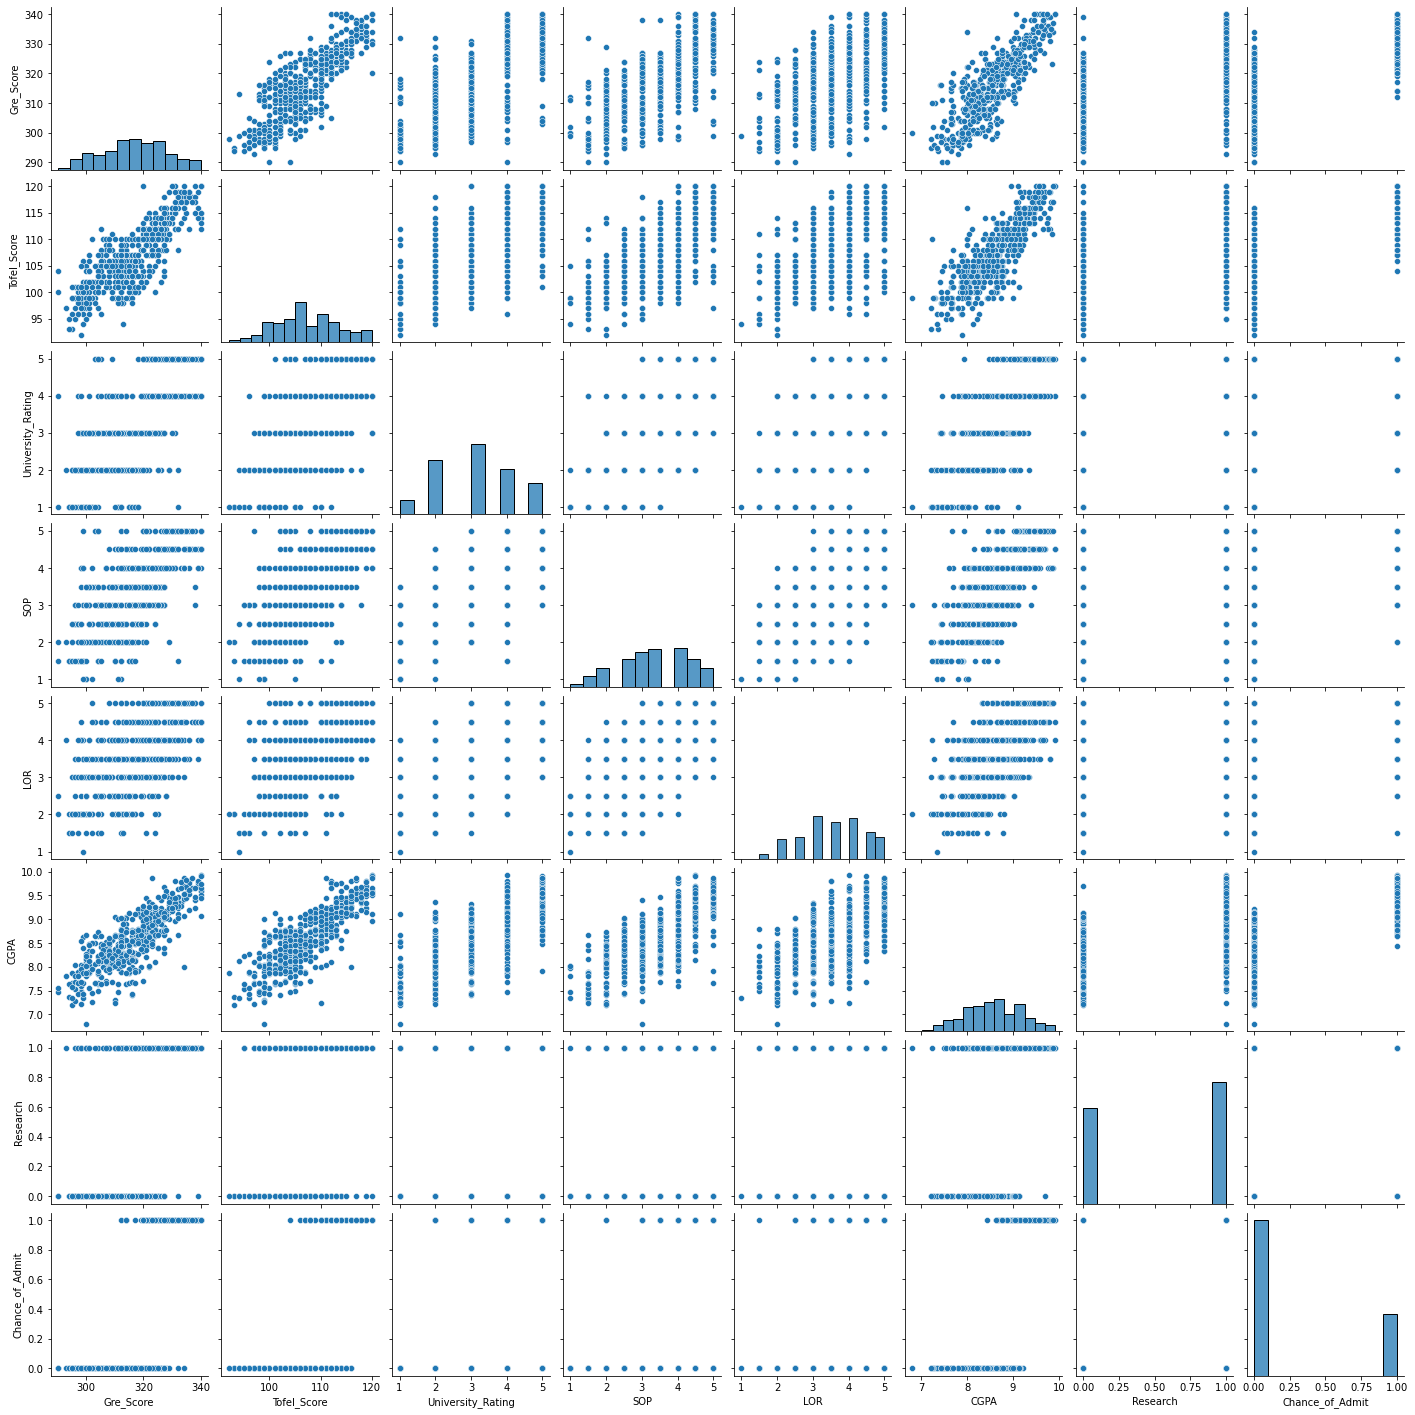

In [15]:
# corelogram
sns.pairplot(df)

In [16]:
df.Gre_Score.min()

290

In [17]:
df.Gre_Score.max()

340

In [18]:
df.head()

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1.0
2,324,107,4,4.0,4.5,8.87,1,0.0
3,316,104,3,3.0,3.5,8.00,1,0.0
4,322,110,3,3.5,2.5,8.67,1,0.0
5,314,103,2,2.0,3.0,8.21,0,0.0


In [19]:
df.University_Rating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64

In [20]:
for i in df.University_Rating.value_counts():
    print({i:(i/500*100)})

{162: 32.4}
{126: 25.2}
{105: 21.0}
{73: 14.6}
{34: 6.800000000000001}


In [21]:
df.head()

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1.0
2,324,107,4,4.0,4.5,8.87,1,0.0
3,316,104,3,3.0,3.5,8.00,1,0.0
4,322,110,3,3.5,2.5,8.67,1,0.0
5,314,103,2,2.0,3.0,8.21,0,0.0


In [22]:
# creating X and Y
X = df.values[:,:-1]
Y = df.values[:,-1].astype(int)


In [23]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

# train test split

In [24]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.25,random_state=10)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 7)
(125, 7)
(375,)
(125,)


# Rinning decision Tree model

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

tree.fit(X_train,Y_train)
Y_pred= tree.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1)]

# Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[84  5]
 [ 7 29]]
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        89
           1       0.85      0.81      0.83        36

    accuracy                           0.90       125
   macro avg       0.89      0.87      0.88       125
weighted avg       0.90      0.90      0.90       125

Accuracy of the model:  0.904


In [28]:
tree.score(X_train,Y_train)

1.0

In [29]:
print(list(zip(df.columns[0:-1],tree.feature_importances_)))

[('Gre_Score', 0.040397623266748436), ('Tofel_Score', 0.050706085899324314), ('University_Rating', 0.0396919130982687), ('SOP', 0.004383811461036685), ('LOR', 0.043042049345054276), ('CGPA', 0.8062917965162738), ('Research', 0.015486720413293879)]


# Trying with diffrent models

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#first initialize the classifier
tree = DecisionTreeClassifier(random_state=10)#
knn = KNeighborsClassifier(n_neighbors=15,metric="euclidean")
svm = SVC(kernel="rbf",gamma=0.1,C=1,random_state=10)
logreg = LogisticRegression(multi_class="multinomial",random_state=10)

In [31]:
np.sqrt(len(X_train))

19.364916731037084

In [32]:
from sklearn.metrics import accuracy_score
my_dict={}
for k in range(1,20):
    model_knn=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    model_knn.fit(X_train,Y_train)
    Y_pred=model_knn.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred),"for k-value:",k)
    my_dict[k]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.92 for k-value: 1
Accuracy is 0.912 for k-value: 2
Accuracy is 0.944 for k-value: 3
Accuracy is 0.952 for k-value: 4
Accuracy is 0.952 for k-value: 5
Accuracy is 0.936 for k-value: 6
Accuracy is 0.96 for k-value: 7
Accuracy is 0.944 for k-value: 8
Accuracy is 0.944 for k-value: 9
Accuracy is 0.944 for k-value: 10
Accuracy is 0.952 for k-value: 11
Accuracy is 0.952 for k-value: 12
Accuracy is 0.952 for k-value: 13
Accuracy is 0.952 for k-value: 14
Accuracy is 0.96 for k-value: 15
Accuracy is 0.952 for k-value: 16
Accuracy is 0.96 for k-value: 17
Accuracy is 0.952 for k-value: 18
Accuracy is 0.96 for k-value: 19


In [33]:
models= [tree, knn, svm, logreg]

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100)
    print("Classification report:\n", clf_report)
    print("\n")

[[84  5]
 [ 7 29]]
The accuracy of the  DecisionTreeClassifier  model is  90.4
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        89
           1       0.85      0.81      0.83        36

    accuracy                           0.90       125
   macro avg       0.89      0.87      0.88       125
weighted avg       0.90      0.90      0.90       125



[[88  1]
 [ 4 32]]
The accuracy of the  KNeighborsClassifier  model is  96.0
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.97      0.89      0.93        36

    accuracy                           0.96       125
   macro avg       0.96      0.94      0.95       125
weighted avg       0.96      0.96      0.96       125



[[87  2]
 [ 4 32]]
The accuracy of the  SVC  model is  95.19999999999999
Classification report:
               precision    recall  f1-sco

In [44]:
Y_test.shape

(125,)

In [45]:
Y_pred.shape

(125,)

In [53]:
pred["Y_actual"]=Y_test
pred["Y_predict"]=Y_pred

In [54]:
pred

,Y_actual,Y_predict
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
120,0,0
121,1,1
122,0,0
123,1,1


In [56]:
X_test_inverse = scaler.inverse_transform(X_test)
X_test_inverse

array([[332.  , 116.  ,   5.  ,   5.  ,   5.  ,   9.28,   1.  ],
       [325.  , 114.  ,   5.  ,   4.  ,   5.  ,   9.46,   1.  ],
       [326.  , 108.  ,   3.  ,   3.  ,   3.5 ,   8.89,   0.  ],
       [324.  , 111.  ,   5.  ,   4.5 ,   4.  ,   9.16,   1.  ],
       [303.  , 105.  ,   5.  ,   5.  ,   4.5 ,   8.65,   0.  ],
       [320.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.74,   1.  ],
       [312.  , 105.  ,   2.  ,   2.  ,   2.5 ,   8.45,   0.  ],
       [332.  , 108.  ,   5.  ,   4.5 ,   4.  ,   9.02,   1.  ],
       [309.  , 104.  ,   2.  ,   2.  ,   2.5 ,   8.26,   0.  ],
       [312.  , 106.  ,   3.  ,   4.  ,   3.5 ,   8.79,   1.  ],
       [328.  , 116.  ,   4.  ,   5.  ,   3.5 ,   9.6 ,   1.  ],
       [321.  , 112.  ,   5.  ,   5.  ,   5.  ,   9.06,   1.  ],
       [329.  , 111.  ,   4.  ,   4.5 ,   4.  ,   9.01,   1.  ],
       [312.  , 104.  ,   3.  ,   3.5 ,   3.5 ,   8.42,   0.  ],
       [325.  , 110.  ,   4.  ,   3.5 ,   4.  ,   8.67,   1.  ],
       [316.  , 111.  ,  

In [61]:
pred = pd.DataFrame(X_test_inverse)
pred

,0,1,2,3,4,5,6
0,332.0,116.0,5.0,5.0,5.0,9.28,1.0
1,325.0,114.0,5.0,4.0,5.0,9.46,1.0
2,326.0,108.0,3.0,3.0,3.5,8.89,0.0
3,324.0,111.0,5.0,4.5,4.0,9.16,1.0
4,303.0,105.0,5.0,5.0,4.5,8.65,0.0
...,...,...,...,...,...,...,...
120,317.0,100.0,2.0,3.0,2.5,8.57,0.0
121,331.0,117.0,4.0,4.5,5.0,9.42,1.0
122,323.0,113.0,3.0,4.0,4.0,8.88,1.0
123,328.0,110.0,4.0,4.0,2.5,9.02,1.0


In [62]:
pred["Y_actual"]=Y_test
pred["Y_predict"]=Y_pred

In [63]:
pred

,0,1,2,3,4,5,6,Y_actual,Y_predict
0,332.0,116.0,5.0,5.0,5.0,9.28,1.0,1,1
1,325.0,114.0,5.0,4.0,5.0,9.46,1.0,1,1
2,326.0,108.0,3.0,3.0,3.5,8.89,0.0,0,0
3,324.0,111.0,5.0,4.5,4.0,9.16,1.0,1,1
4,303.0,105.0,5.0,5.0,4.5,8.65,0.0,0,0
...,...,...,...,...,...,...,...,...,...
120,317.0,100.0,2.0,3.0,2.5,8.57,0.0,0,0
121,331.0,117.0,4.0,4.5,5.0,9.42,1.0,1,1
122,323.0,113.0,3.0,4.0,4.0,8.88,1.0,0,0
123,328.0,110.0,4.0,4.0,2.5,9.02,1.0,1,1


In [64]:
pred.columns=["Gre_Score","Tofel_Score","University_Rating","SOP","LOR","CGPA","Research","Y_actual","Y_pred"]

In [65]:
pred

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Y_actual,Y_pred
0,332.0,116.0,5.0,5.0,5.0,9.28,1.0,1,1
1,325.0,114.0,5.0,4.0,5.0,9.46,1.0,1,1
2,326.0,108.0,3.0,3.0,3.5,8.89,0.0,0,0
3,324.0,111.0,5.0,4.5,4.0,9.16,1.0,1,1
4,303.0,105.0,5.0,5.0,4.5,8.65,0.0,0,0
...,...,...,...,...,...,...,...,...,...
120,317.0,100.0,2.0,3.0,2.5,8.57,0.0,0,0
121,331.0,117.0,4.0,4.5,5.0,9.42,1.0,1,1
122,323.0,113.0,3.0,4.0,4.0,8.88,1.0,0,0
123,328.0,110.0,4.0,4.0,2.5,9.02,1.0,1,1


In [66]:
pred.Y_pred = pred["Y_pred"].replace({0:"Low",1:"High"})

In [67]:
pred

,Gre_Score,Tofel_Score,University_Rating,SOP,LOR,CGPA,Research,Y_actual,Y_pred
0,332.0,116.0,5.0,5.0,5.0,9.28,1.0,1,High
1,325.0,114.0,5.0,4.0,5.0,9.46,1.0,1,High
2,326.0,108.0,3.0,3.0,3.5,8.89,0.0,0,Low
3,324.0,111.0,5.0,4.5,4.0,9.16,1.0,1,High
4,303.0,105.0,5.0,5.0,4.5,8.65,0.0,0,Low
...,...,...,...,...,...,...,...,...,...
120,317.0,100.0,2.0,3.0,2.5,8.57,0.0,0,Low
121,331.0,117.0,4.0,4.5,5.0,9.42,1.0,1,High
122,323.0,113.0,3.0,4.0,4.0,8.88,1.0,0,Low
123,328.0,110.0,4.0,4.0,2.5,9.02,1.0,1,High


In [70]:
pred.to_excel("Peg_project_decision_tree.xlsx",header=True,index=False)